# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [41]:
!pip install palmerpenguins

In [42]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_line, labs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from palmerpenguins import load_penguins


In [43]:
# Code Here
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [44]:
penguins = penguins.dropna()

In [45]:
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex']) #dummifying these variables

penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [46]:
# Code Here
X1 = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']
m1 = LinearRegression().fit(X1, y)

In [47]:
X2 = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
m2 = LinearRegression().fit(X2, y)

In [48]:
X3_columns = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']
X3 = penguins[X3_columns]
m3 = LinearRegression().fit(X3, y)

In [49]:
X4 = penguins.drop(columns=['bill_depth_mm'])
m4 = LinearRegression().fit(X4, y)

In [50]:
train_data, test_data = train_test_split(penguins, test_size=0.25)

y_train = train_data['bill_depth_mm']
y_test = test_data['bill_depth_mm']

In [51]:
X1_train = train_data[['bill_length_mm']]
X2_train = train_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X3_train = train_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']]
X4_train = train_data.drop(columns=['bill_depth_mm'])

In [52]:
X1_test = test_data[['bill_length_mm']]
X2_test = test_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X3_test = test_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']]
X4_test = test_data.drop(columns=['bill_depth_mm'])

In [53]:
models = [LinearRegression() for _ in range(4)]
X_train_list = [X1_train, X2_train, X3_train, X4_train]
X_test_list = [X1_test, X2_test, X3_test, X4_test]
train_errors, test_errors = [], []

for i, model in enumerate(models):
    model.fit(X_train_list[i], y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_list[i])))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_list[i])))

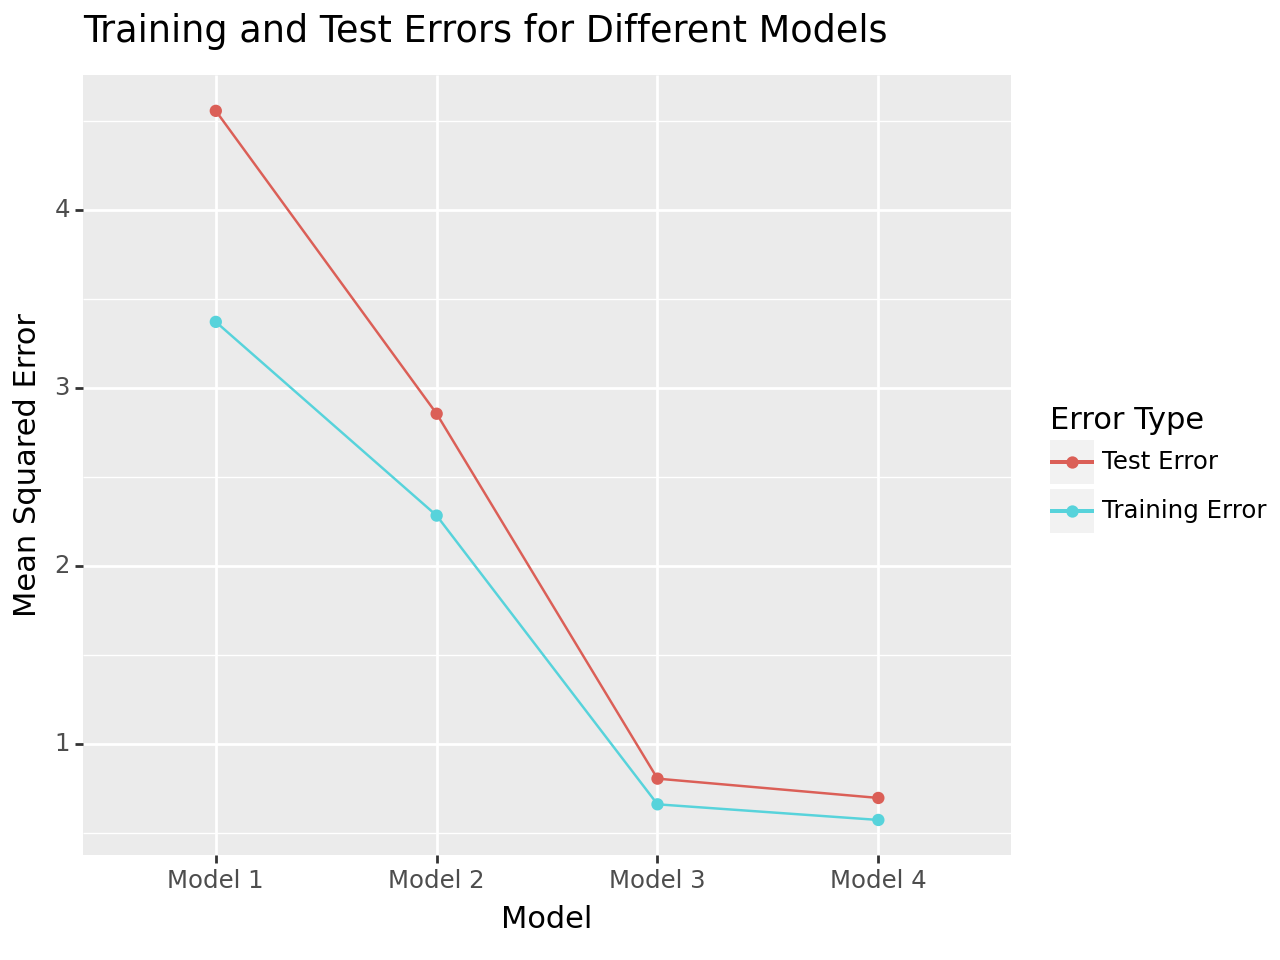

In [54]:
error_data = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'] * 2,
    'Error Type': ['Training Error'] * 4 + ['Test Error'] * 4,
    'Error': train_errors + test_errors
})

# graph
plot = (ggplot(error_data, aes(x='Model', y='Error', color='Error Type', group='Error Type')) +
        geom_point() +
        geom_line() +
        labs(title='Training and Test Errors for Different Models', y='Mean Squared Error')
       )

print(plot)

Based on the plot Model 1 and Model 2 have higher number of test errors than Model 3 and Model 4. Model 4 is better due to MSE between Model 3 and Model 4.